# 📌 1. Business Understanding  

## 🎯 Customer Churn Prediction and Retention Strategies  

### 🔄 What is Customer Churn?  
Customer **churn** refers to the loss of customers within a given timeframe.  

---

### 💸 Why is Churn Costly for Businesses?  
- Acquiring **new customers** is almost **5× more expensive** than retaining existing ones.  
- High churn rates directly reduce profitability and growth potential.  

---

### ⚠️ Challenges in the Telecom Industry  
- 📊 **High competition** and saturated markets  
- 💰 **Price sensitivity** among customers  
- 😟 **Dissatisfaction** with service quality, pricing, or offers  

---

### ✅ Importance of Reducing Churn  
- 💵 **Improve profitability**: Retaining customers reduces acquisition costs.  
- 🤝 **Enhance loyalty**: Focus on retention builds stronger, long-term customer relationships.  
- 🎯 **Optimize marketing**: Enables better targeting of promotions and offers to loyal customers.  



In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 
        
import warnings

# This line specifically suppresses all FutureWarning messages.
warnings.simplefilter(action='ignore', category=FutureWarning)

# Now, run your data loading and plotting code (e.g., using Seaborn).
# import pandas as pd
# import seaborn as sns
# ...

# You can now run your code, and the warnings should be gone.

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churnn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [45]:
df=pd.read_csv('/kaggle/input/churnn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

**Check the First 5 rows**

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Check the type of the columns and the null values**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Shape of the data**

In [48]:
df.shape

(7043, 21)






**Check missing values**

In [49]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Column Data Types

In [50]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Statistical analysis**

In [51]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Check duplicates**

In [52]:
sum(df.duplicated())

0

**Check number of unique values**

In [53]:
df.columns.nunique()

21

#### Target Variable Distribution (Counts)

In [54]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [55]:
df.drop(columns=["customerID"],inplace=True)

#### Unique Values in Categorical Columns

In [56]:
df.select_dtypes(include = ['object']).nunique()

gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

#### Check Data Anomaly (Tenure=0)

In [57]:
print(df[df['tenure']==0])

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [58]:
# Fix the 11 rows where tenure is 0 (which have blank 'TotalCharges')
# Your code had a typo ('Totalcharges' vs 'TotalCharges')
df.loc[df['tenure'] == 0, 'TotalCharges'] = '0'

# Now, convert the ENTIRE column to a numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

#### Visualize Overall Churn Rate

Churn Distribution:
 Churn
No     73.463013
Yes    26.536987
Name: percentage, dtype: float64



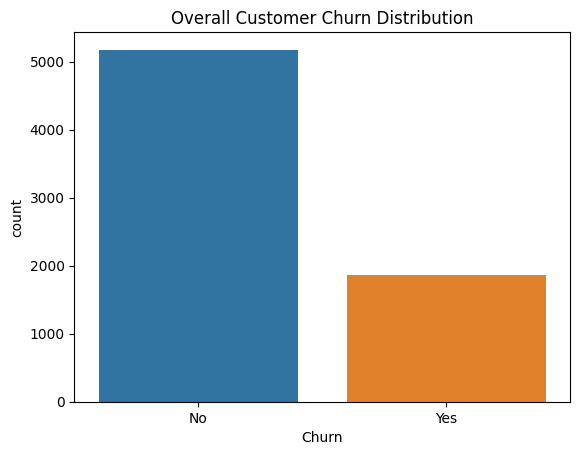

In [59]:
import matplotlib.pyplot as plt 
import seaborn as sns 

churn_percentage = (df['Churn'].value_counts(normalize = True)*100).rename('percentage')
print(f"Churn Distribution:\n {churn_percentage}\n") 

sns.countplot(data=df, x='Churn')
plt.title('Overall Customer Churn Distribution')
plt.show()

#### Numeric Features vs Churn (Histograms)

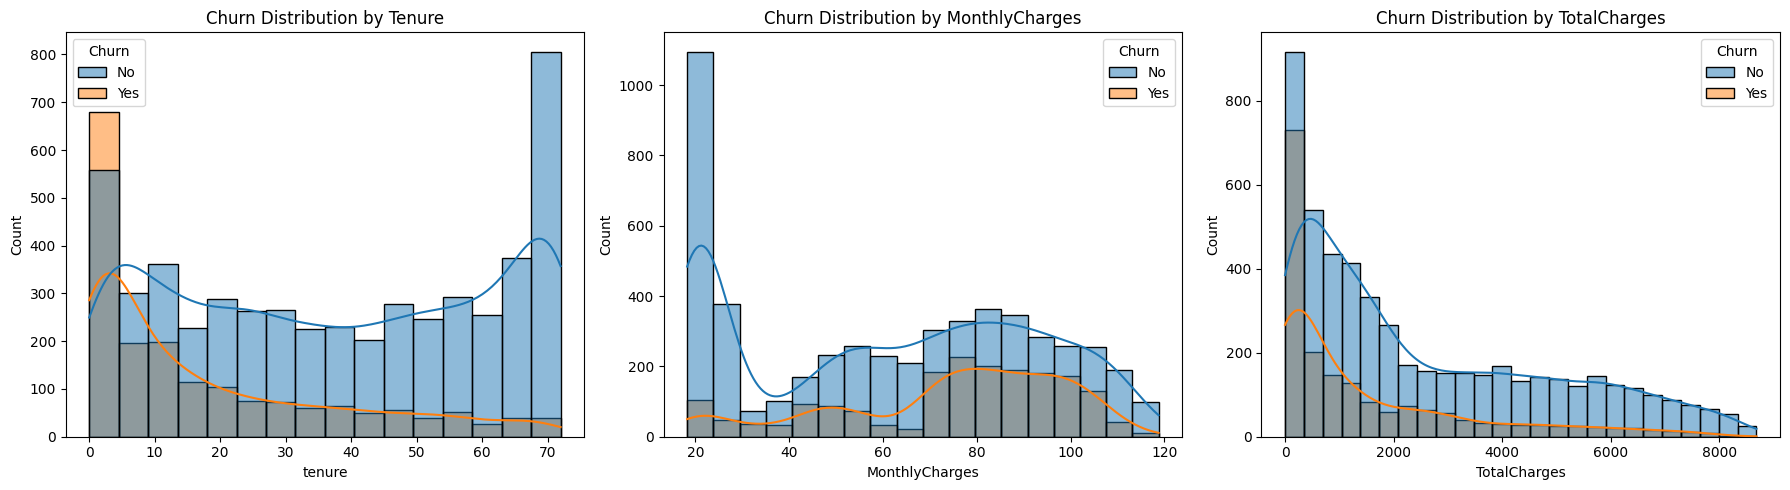

In [60]:
fig,axes = plt.subplots(1,3, figsize = (18,5))
sns.histplot(data= df,x= 'tenure' ,hue='Churn', kde = True, ax=axes[0])
axes[0].set_title('Churn Distribution by Tenure')
sns.histplot(data= df,x= 'MonthlyCharges' ,hue='Churn', kde = True, ax=axes[1])
axes[1].set_title('Churn Distribution by MonthlyCharges')
sns.histplot(data= df,x= 'TotalCharges' ,hue='Churn', kde = True, ax=axes[2])
axes[2].set_title('Churn Distribution by TotalCharges')

plt.tight_layout()
plt.show()

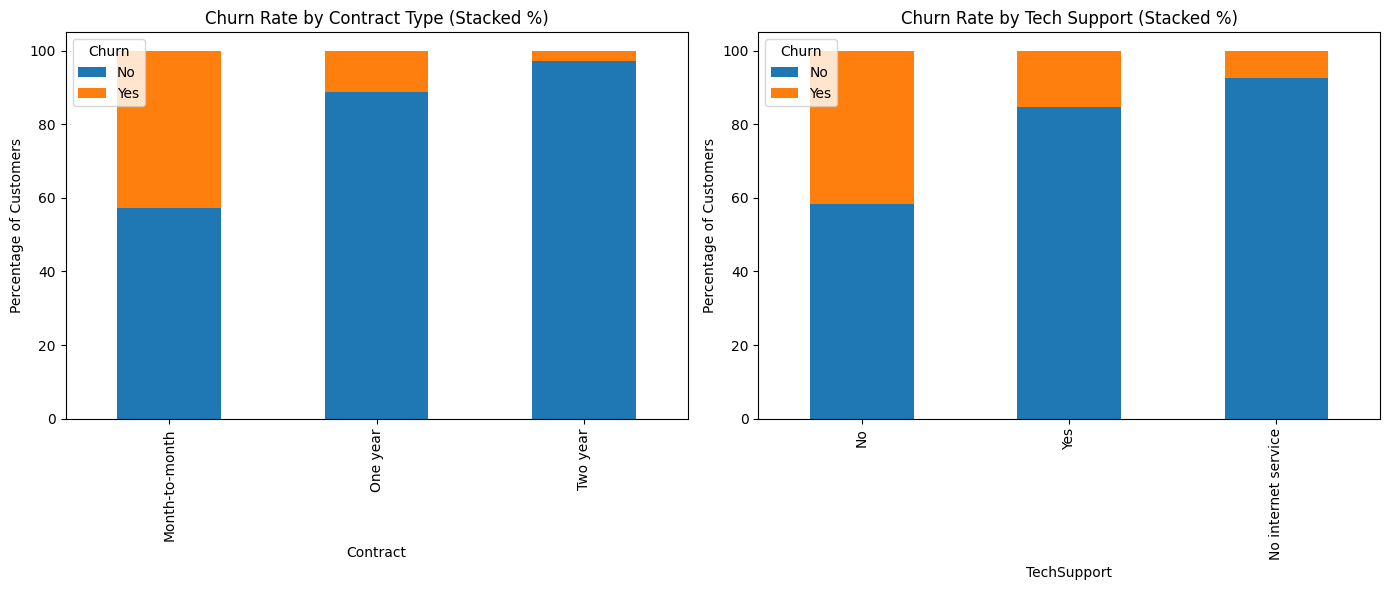

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot for Contract ---
# We use normalize=True on value_counts to get percentages
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().mul(100)

# Sort by 'Yes' churn rate
contract_churn.sort_values(by='Yes', ascending=False, inplace=True)

contract_churn.plot(kind='bar', stacked=True, ax=axes[0],
                     title='Churn Rate by Contract Type (Stacked %)')
axes[0].set_ylabel('Percentage of Customers')


# --- Plot for TechSupport ---
tech_churn = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack().mul(100)

# Sort by 'Yes' churn rate
tech_churn.sort_values(by='Yes', ascending=False, inplace=True)

tech_churn.plot(kind='bar', stacked=True, ax=axes[1],
                   title='Churn Rate by Tech Support (Stacked %)')
axes[1].set_ylabel('Percentage of Customers')


plt.tight_layout()
plt.show()

#### Add-on Services vs Churn (Bar Charts)

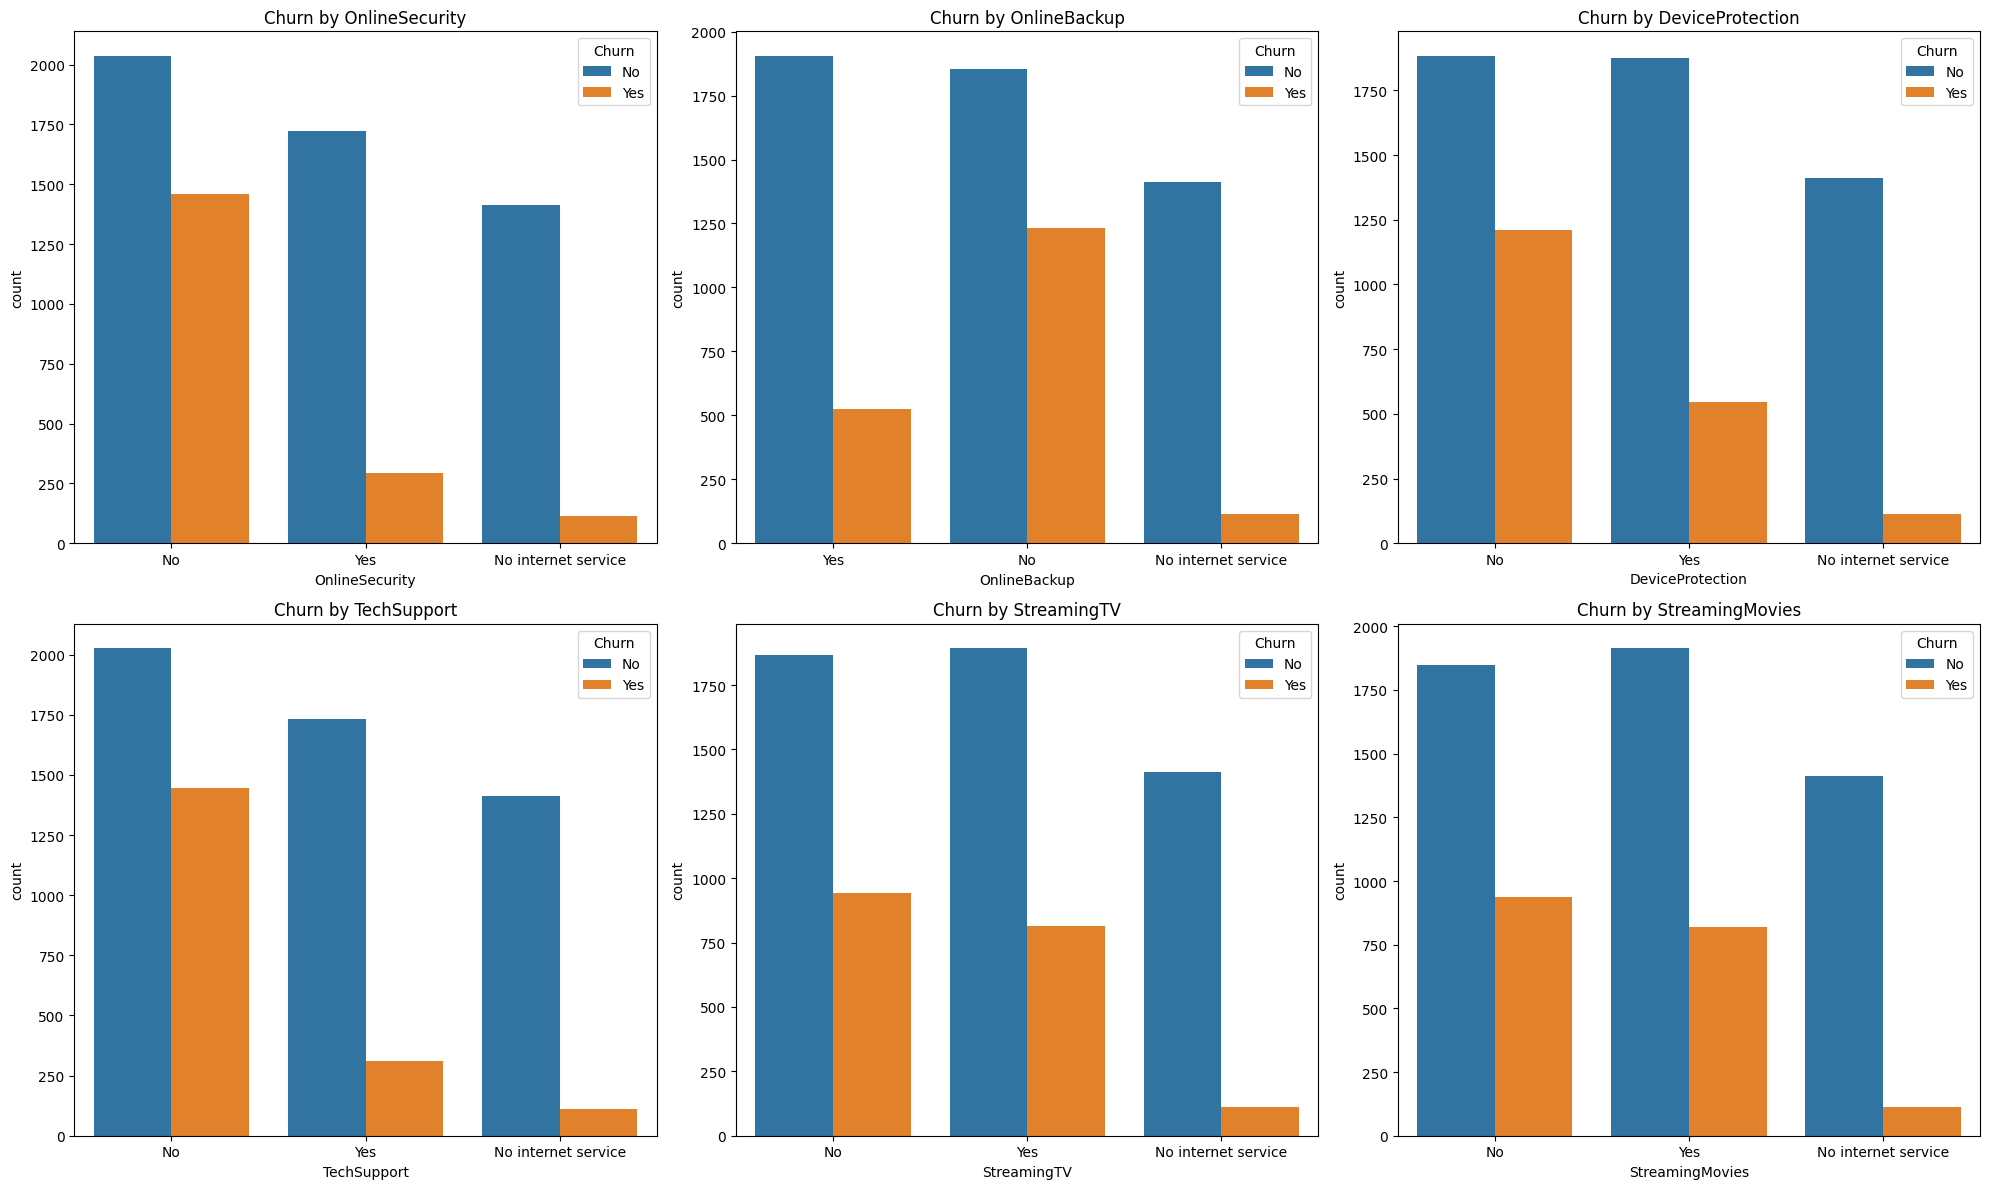

In [62]:
# Columns for internet add-ons
addon_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() # Make it easy to loop over subplots

for i, col in enumerate(addon_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {col}')

plt.tight_layout()
plt.show() 

#### Feature Interaction: Contract & Internet Service

The figure layout has changed to tight


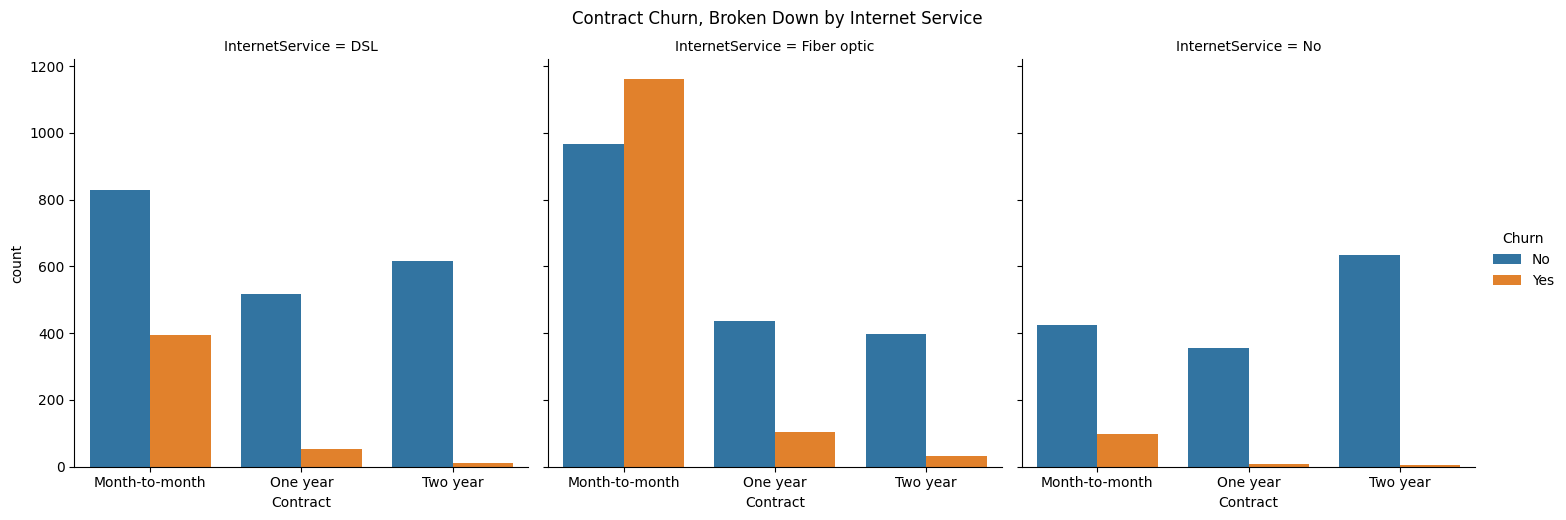

In [63]:
# Use catplot (Categorical Plot) to easily create subplots
sns.catplot(data=df, x='Contract', kind='count', hue='Churn', col='InternetService')
plt.suptitle('Contract Churn, Broken Down by Internet Service', y=1.03)
plt.show()

#### Correlation Between Numeric Features

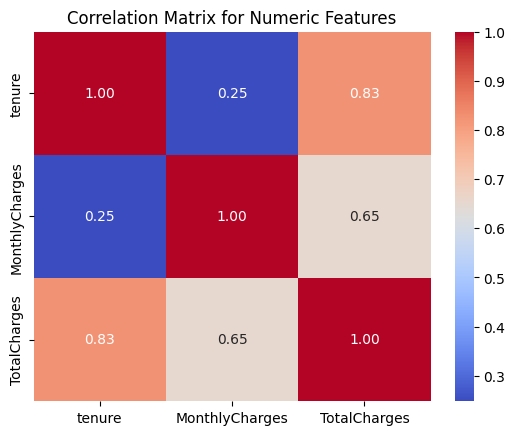

In [64]:
# Create a new DataFrame with just numeric cols
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

# (Make sure TotalCharges is numeric first)
numeric_df['TotalCharges'] = pd.to_numeric(numeric_df['TotalCharges'], errors='coerce')
numeric_df.dropna(inplace=True)

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

**Map Target Variable to Numeric**

In [65]:
df['Churn'] = df['Churn'].map({"Yes":1, "No":0})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

**Separate Features (X) and Target (y)**

In [66]:
X= df.drop(columns = 'Churn')
y= df['Churn']

**Install Imbalanced-Learn Library**

In [67]:
pip install imbalanced-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


**Identify Numerical Columns**

In [68]:
numerical_cols =[]
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col!= 'Churn':
        numerical_cols.append(col)

**Display Numerical Columns**

In [69]:
numerical_cols 

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

**Apply Random Over-Sampling (ROS)**

In [70]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X,y = ros.fit_resample(X,y)

**Identify Categorical Columns**

In [71]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype in ['object', 'bool']: 
        categorical_cols.append(col)

**Create Tenure Groups (Feature Engineering)**

In [72]:
bins = [0,12,24,48,60,72]
labels = ['0-1_Year', '1-2_Years', '2-4_Years', '4-5_Years', '5-6_Years']
df['TenureGroup']= pd.cut(df['tenure'], bins = bins, labels= labels, right= False)

**Create Service Count Feature (Feature Engineering)**

In [73]:
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
df['ServiceCount'] = df[service_cols].replace({'Yes': 1, 'No': 0, 'No internet service': 0}).sum(axis=1)

**Display Categorical Columns**

In [74]:
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

**Create High-Risk Combo Feature (Feature Engineering)**

In [75]:
df['HighRisk_Combo'] = ((df['Contract'] == 'Month-to-month') & 
                        (df['TechSupport'] == 'No') & 
                        (df['InternetService'] == 'Fiber optic')).astype(int)

**Apply One-Hot Encoding**

In [76]:
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


**Display Encoded Features**

In [77]:
X_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,19,55.00,1046.50,True,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
10344,0,15,49.10,679.55,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
10345,0,3,91.85,257.05,True,False,True,True,False,True,...,False,False,False,True,False,False,False,False,True,False
10346,1,47,85.20,3969.35,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False


**Install/Update ML Libraries**

In [78]:
 pip install -U scikit-learn xgboost lightgbm catboost


  Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


**Train-Test Split**

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=2529)

**Define Models & Cross-Validation Setup**

In [80]:
# Preprocessing & Evaluation
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.preprocessing import StandardScaler

models = {
    "LogisticRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(
            max_iter=3000,  # increased iterations
            penalty='l2',
            C=0.7,
            solver='lbfgs',
            class_weight='balanced'
        ))
    ]),

    "RandomForest": RandomForestClassifier(
        n_estimators=600,
        max_depth=12,
        min_samples_split=4,
        min_samples_leaf=2,
        max_features='sqrt',
        class_weight='balanced_subsample',
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        scale_pos_weight=3,
        random_state=42,
        reg_lambda=1.0,
        reg_alpha=0.5,
        use_label_encoder=False
    ),

    "LightGBM": LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        class_weight='balanced'
    ),

    "CatBoost": CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        eval_metric='AUC',
        loss_function='Logloss',
        scale_pos_weight=3,
        random_seed=42,
        verbose=0  # clean output
    )
}

# Evaluate Models (Cross-Validation ROC-AUC & Accuracy)
for name, model in models.items():
    roc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"{name} → ROC-AUC: {roc_scores.mean():.4f} | Accuracy: {acc_scores.mean():.4f}")


LogisticRegression → ROC-AUC: 0.8467 | Accuracy: 0.7648
RandomForest → ROC-AUC: 0.9108 | Accuracy: 0.8370


[10:38:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[10:38:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_la

XGBoost → ROC-AUC: 0.9095 | Accuracy: 0.8203
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3101, number of negative: 3107
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 6208, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3102, number of negative: 3107
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if mem

**Check Data Types (After Resampling) & Import Classification Report**

In [81]:
X.dtypes
from sklearn.metrics import classification_report

**Train Final Models & Generate Classification Reports on Test Set**

In [82]:
for name, model in models.items():
    model.fit(X_train, y_train)   # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    print(f"{name} classification_report →",)
    print(classification_report(y_test,y_pred) )  # show first 10 predictions


LogisticRegression classification_report →
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1290
           1       0.73      0.82      0.77      1297

    accuracy                           0.76      2587
   macro avg       0.76      0.76      0.75      2587
weighted avg       0.76      0.76      0.75      2587

RandomForest classification_report →
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1290
           1       0.79      0.92      0.85      1297

    accuracy                           0.83      2587
   macro avg       0.85      0.83      0.83      2587
weighted avg       0.85      0.83      0.83      2587



[10:39:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.



XGBoost classification_report →
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      1290
           1       0.73      0.98      0.84      1297

    accuracy                           0.81      2587
   macro avg       0.85      0.81      0.80      2587
weighted avg       0.85      0.81      0.80      2587

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3877, number of negative: 3884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 7761, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM 

**Map 'No Service' Values & Encode Service Columns**

In [83]:
service_no_cols = [
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

for col in service_no_cols:
    X[col] = X[col].replace({"No internet service": "No", "No phone service": "No"})
    X[col] = X[col].map({"Yes": 1, "No": 0})

**Convert Binary 'Yes'/'No' Columns to Boolean**

In [84]:
for col in X.columns:
    uniques = set(X[col].dropna().unique())
    if uniques.issubset({"Yes", "No"}):
        X[col] = X[col].astype("bool")


**Verify Data Types After Mapping/Conversion**

In [85]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling       bool
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

**Calculate & Plot SHAP Values (LightGBM)**

Calculating SHAP values...


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Generating SHAP summary plot...


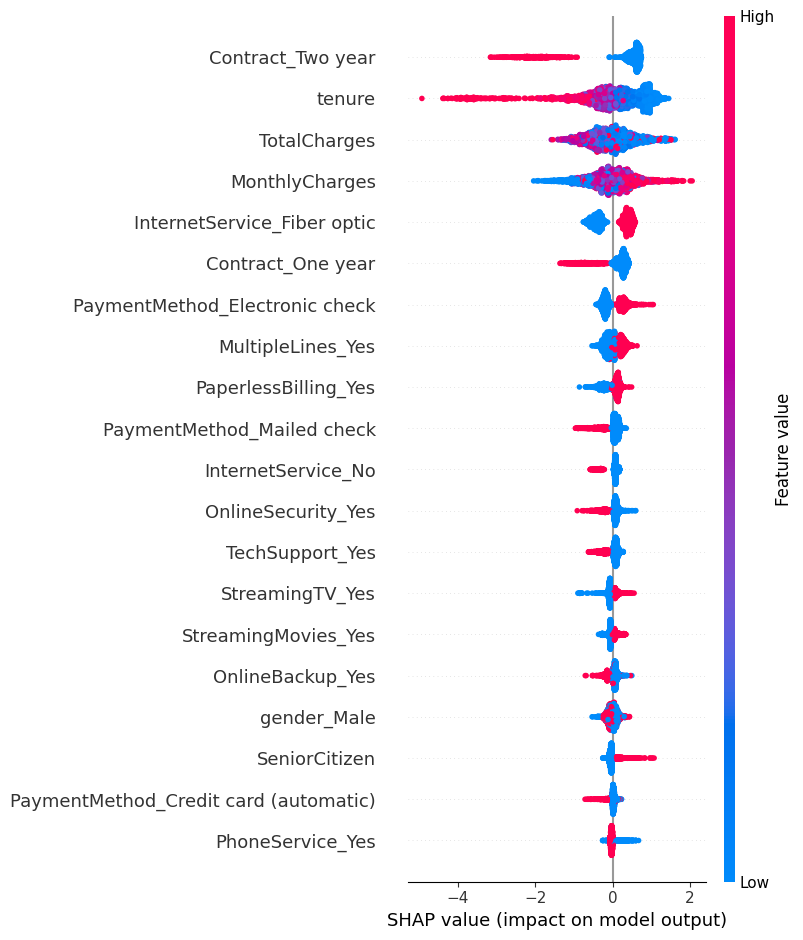

In [86]:
import shap
import matplotlib.pyplot as plt

model_to_explain = models["LightGBM"]   

data_for_shap = X_test    
explainer = shap.TreeExplainer(model_to_explain)

# 3. Calculate the SHAP values
print("Calculating SHAP values...")
shap_values = explainer.shap_values(data_for_shap)

# 4. Generate the Summary Plot
print("Generating SHAP summary plot...")
plt.figure()
shap.summary_plot(shap_values[1], data_for_shap, show=False) 
# ... (rest of your code is correct) ...